In [161]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
warnings.filterwarnings("ignore")
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/permutation/'
CV=pd.read_csv(outDir+'CV/acc.csv')
SS=pd.read_csv(outDir+'SS/acc.csv')
BS=pd.read_csv(outDir+'BS/acc.csv')
DS=pd.read_csv(outDir+'DS/acc.csv')
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['motor','mem','mixed']
#comparison of generating null results
perm_same_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/same_task.csv')
perm_diff_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/diff_task.csv')


same_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/real_same_task.csv')
diff_task=pd.read_csv(thisDir+'output/mL/results/ridge/permutation/real_diff_task.csv')




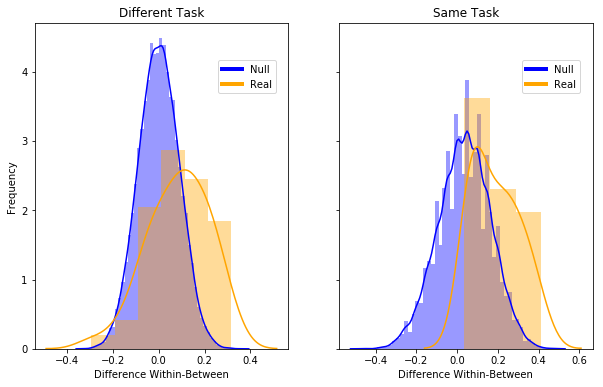

In [33]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]

fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=2)
#Different Tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(perm_diff_task['acc_diff'],color='blue', ax=ax1)
g=sns.distplot(diff_task['acc_diff'], color='orange',ax=ax1)
ax.set(xlabel='Within-Between')
ax.set_title('Different Task')
ax.set(ylabel='Frequency')
ax.legend(custom_lines, ['Null','Real'],loc='upper right',fontsize='medium',bbox_to_anchor=(.97, .9))


ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task['acc_diff'],color='blue', ax=ax2)
g=sns.distplot(same_task['acc_diff'], color='orange',ax=ax2)
ax.set(xlabel='Within-Between')
ax.set_title('Same Task')
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Null','Real'],loc='upper right',fontsize='medium',bbox_to_anchor=(.97, .9))


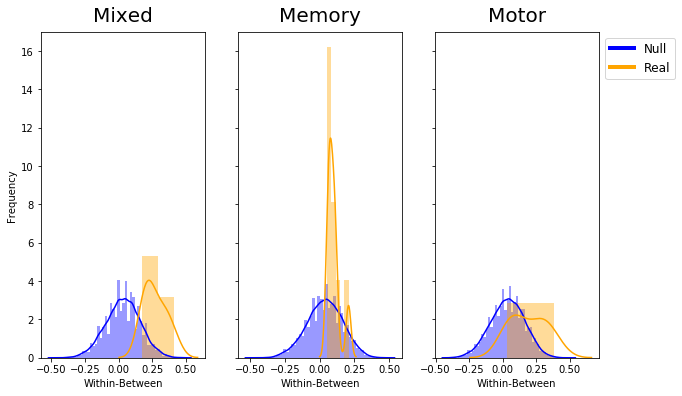

In [107]:
#same task 

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]

fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=3)
#Mixed
ax1=fig.add_subplot(gs[0,0])
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='mixed')].acc_diff.values,color='blue', ax=ax1)
g=sns.distplot(same_task[(same_task['task']=='mixed')].acc_diff.values, color='orange',ax=ax1)
ax.set(xlabel='Within-Between')
ax.set_title('Mixed',fontsize=20, pad=10)
ax.set(ylabel='Frequency')


#Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='mem')].acc_diff.values,color='blue', ax=ax2)
g=sns.distplot(same_task[(same_task['task']=='mem')].acc_diff.values, color='orange',ax=ax2)
ax.set(xlabel='Within-Between')
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(ylabel=' ')


ax3=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
ax=sns.distplot(perm_same_task[(perm_same_task['task']=='motor')].acc_diff.values,color='blue', ax=ax3)
g=sns.distplot(same_task[(same_task['task']=='motor')].acc_diff.values, color='orange',ax=ax3)
ax.set(xlabel='Within-Between')
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Null','Real'],loc='upper right',fontsize='large',bbox_to_anchor=(1.5, 1.0))
plt.savefig(thisDir+'output/mL/images/ridge/figs/sameTask_perm_plots.png', bbox_inches='tight')

In [48]:
perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='motor')].acc_diff.values

array([ 0.06428571, -0.01785714, -0.18642857, ..., -0.11714286,
       -0.17142857,  0.035     ])

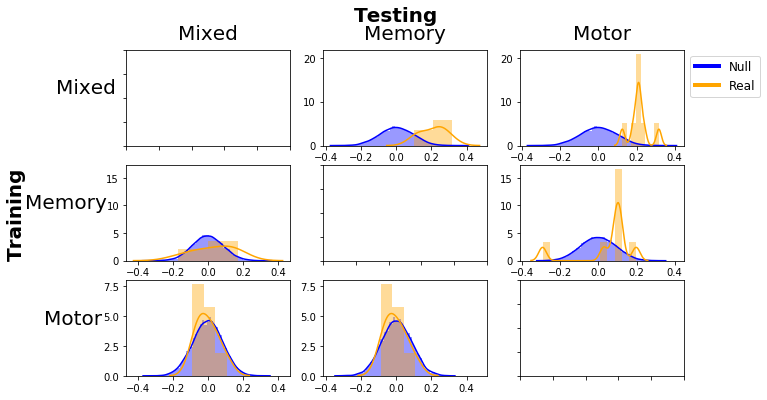

In [104]:
#Diff task 
fig=plt.figure(figsize=(10,6), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=3, ncols=3)
fig.suptitle('Testing', fontsize=20, fontweight='bold')
fig.text(-0.04, 0.5, 'Training', va='center', fontweight='bold',fontsize=20,rotation='vertical')
#Test Mixed font
ax0=fig.add_subplot(gs[0,0])
plt.setp(ax0.get_yticklabels(), visible=False)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Mixed', fontsize=20, pad=10)
ax0.set_ylabel('Mixed', rotation=0, fontsize=20, labelpad=40)
#Mixed test motor
ax1=fig.add_subplot(gs[0,1])
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax1)
g=sns.distplot(diff_task[(diff_task.train_task=='mixed')&(diff_task.test_task=='motor')].acc_diff.values, color='orange',ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)

#Mixed test Memory
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mixed')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax2)
g=sns.distplot(diff_task[(diff_task.train_task=='mixed')&(diff_task.test_task=='mem')].acc_diff.values, color='orange',ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(ylabel=' ')
ax.legend(custom_lines, ['Null','Real'],loc='upper right',fontsize='large',bbox_to_anchor=(1.5, 1.0))

#Memory test mixed
ax3=fig.add_subplot(gs[1,0])
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mem')&(perm_diff_task.test_task=='mixed')].acc_diff.values,color='blue', ax=ax3)
g=sns.distplot(diff_task[(diff_task.train_task=='mem')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax3)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=40)

#Memory test memory
ax4=fig.add_subplot(gs[1,1])
plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

#Memory test motor
ax5=fig.add_subplot(gs[1,2],sharex=ax2, sharey=ax3)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='mem')&(perm_diff_task.test_task=='motor')].acc_diff.values,color='blue', ax=ax5)
g=sns.distplot(diff_task[(diff_task.train_task=='mem')&(diff_task.test_task=='motor')].acc_diff.values, color='orange',ax=ax5)


#Motor test mixed
ax6=fig.add_subplot(gs[2,0],sharex=ax3)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='motor')&(perm_diff_task.test_task=='mixed')].acc_diff.values,color='blue', ax=ax6)
g=sns.distplot(diff_task[(diff_task.train_task=='motor')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax6)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=30)

#motor test mem
ax7=fig.add_subplot(gs[2,1],sharey=ax6, sharex=ax1)
ax=sns.distplot(perm_diff_task[(perm_diff_task.train_task=='motor')&(perm_diff_task.test_task=='mem')].acc_diff.values,color='blue', ax=ax7)
g=sns.distplot(diff_task[(diff_task.train_task=='motor')&(diff_task.test_task=='mixed')].acc_diff.values, color='orange',ax=ax7)


#Motor test motor
ax8=fig.add_subplot(gs[2,2])
plt.setp(ax8.get_yticklabels(), visible=False)
plt.setp(ax8.get_xticklabels(), visible=False)



plt.savefig(thisDir+'output/mL/images/ridge/figs/diffTask_perm_plots.png', bbox_inches='tight')

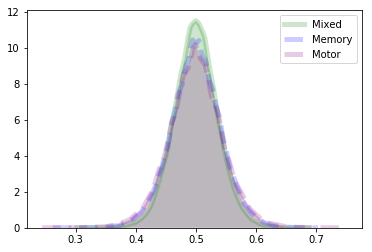

In [5]:
ax=sns.kdeplot(DS[(DS['task']=='mixed')].acc.values, label='Mixed', shade=True, linewidth=5, color='Green', alpha=.2)


ax=sns.kdeplot(DS[(DS['task']=='mem')].acc.values, label='Memory',shade=False, linestyle='--',  linewidth=5, color='Blue', alpha=.2)

ax=sns.kdeplot(DS[(DS['task']=='motor')].acc.values, label='Motor',shade=True, linestyle='--',  linewidth=5, color='Purple', alpha=.2)




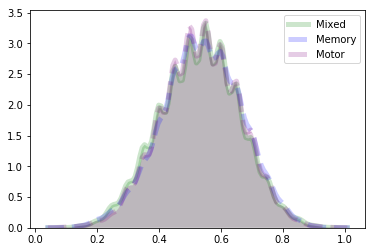

In [6]:
ax=sns.kdeplot(CV['mixed'], label='Mixed', shade=True, linewidth=5, color='Green', alpha=.2)


ax=sns.kdeplot(CV['mem'], label='Memory',shade=False, linestyle='--',  linewidth=5, color='Blue', alpha=.2)

ax=sns.kdeplot(CV['motor'], label='Motor',shade=True, linestyle='--',  linewidth=5, color='Purple', alpha=.2)


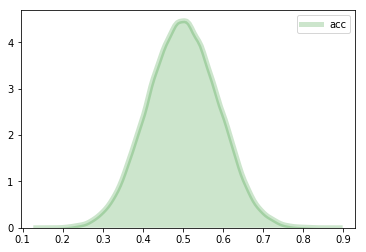

In [2]:
sns.kdeplot(SS['acc'], shade=True, linewidth=5, color='Green', alpha=.2)


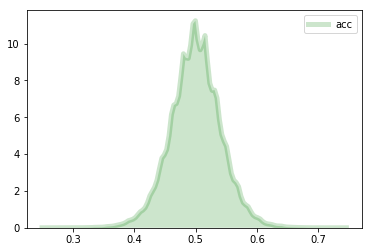

In [3]:
sns.kdeplot(DS['acc'], shade=True, linewidth=5, color='Green', alpha=.2)

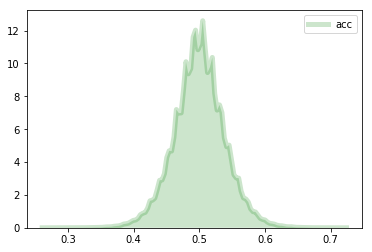

In [4]:
sns.kdeplot(BS['acc'], shade=True, linewidth=5, color='Green', alpha=.2)

In [109]:
same_task.head()

,sub,task,acc,accR,acc_diff
0,MSC01,mixed,0.95,0.732143,0.217857
1,MSC02,mixed,0.90,0.677857,0.222143
2,MSC03,mixed,1.00,0.586429,0.413571
3,MSC04,mixed,1.00,0.822857,0.177143
4,MSC05,mixed,1.00,0.798571,0.201429


In [123]:
#mixed
ST_mixed=same_task.loc[same_task['task']=='mixed']
STmix_avg=ST_mixed.acc_diff.mean()

#motor
ST_motor=same_task.loc[same_task['task']=='motor']
STmotor_avg=ST_motor.acc_diff.mean()

#mem
ST_mem=same_task.loc[same_task['task']=='mem']
STmem_avg=ST_mem.acc_diff.mean()


#permutation count
#mixed
perm_ST_mixed=perm_same_task.loc[perm_same_task['task']=='mixed']


#motor
perm_ST_motor=perm_same_task.loc[perm_same_task['task']=='motor']


#mem
perm_ST_mem=perm_same_task.loc[perm_same_task['task']=='mem']


subset_perm_ST_mixed = perm_ST_mixed[perm_ST_mixed["acc_diff"] > STmix_avg]
count_perm_ST_mixed = subset_perm_ST_mixed.count()


subset_perm_ST_mem = perm_ST_mem[perm_ST_mem["acc_diff"] > STmem_avg]
count_perm_ST_mem = subset_perm_ST_mem.count()


subset_perm_ST_motor = perm_ST_motor[perm_ST_motor["acc_diff"] > STmotor_avg]
count_perm_ST_motor = subset_perm_ST_motor.count()


In [136]:
motor_p=(count_perm_ST_motor.acc_diff+1)/8001

In [139]:
mem_p=(count_perm_ST_mem.acc_diff+1)/8001

In [138]:
mix_p=(count_perm_ST_mixed.acc_diff+1)/8001

In [142]:
motor_p
mem_p
mix_p

0.030371203599550055

In [162]:
foo=ST_mixed.loc[ST_mixed['sub']=='MSC01']

In [170]:
foo
#.get_value(0,'acc_diff')

,sub,task,acc,accR,acc_diff
0,MSC01,mixed,0.95,0.732143,0.217857


In [156]:
sub1=perm_ST_mixed.loc[perm_ST_mixed['sub']=='MSC01']

subset=sub1[sub1['acc_diff']>.21]
count=subset.count()

In [159]:
(count.acc_diff+1)/1001

0.07492507492507493

In [192]:
#dataframe to hold p values for each iteration of analysis 
subs=[]
tasks=[]
p_values=[]
for task in taskList:
    ST=same_task.loc[same_task['task']==task]
    ST.set_index('sub',inplace=True)
    ST_perm=perm_same_task.loc[perm_same_task['task']==task]
    for sub in subList:
        ST_perm_sub=ST_perm.loc[ST_perm['sub']==sub]
        sub_acc=ST.get_value(sub,'acc_diff')
        ST_perm_kept=ST_perm_sub[ST_perm_sub['acc_diff']>sub_acc]
        count=ST_perm_kept.count()
        pval=(count.acc_diff+1)/(1001)
        subs.append(sub)
        tasks.append(task)
        p_values.append(pval)
ST_total=pd.DataFrame({'sub':subs,'task':tasks,'pval':p_values})


ST_total.to_csv(thisDir+'output/mL/results/ridge/permutation/ST_pvals.csv',index=False)

In [191]:
#dataframe to hold p values for each iteration of analysis 
subs=[]
training=[]
testing=[]
p_values=[]
for train_task in taskList:
    for test_task in taskList:
        if train_task==test_task:
            continue
        else:
            DT=diff_task.loc[(diff_task['train_task']==train_task) & (diff_task['test_task']==test_task)]
            DT.set_index('sub',inplace=True)
            DT_perm=perm_diff_task.loc[(perm_diff_task['train_task']==train_task) & (perm_diff_task['test_task']==test_task)]
            for sub in subList:
                DT_perm_sub=DT_perm.loc[DT_perm['sub']==sub]
                sub_acc=DT.get_value(sub,'acc_diff')
                DT_perm_kept=DT_perm_sub[DT_perm_sub['acc_diff']>sub_acc]
                count=DT_perm_kept.count()
                pval=(count.acc_diff+1)/(1001)
                subs.append(sub)
                training.append(train_task)
                testing.append(test_task)
                p_values.append(pval)
DT_total=pd.DataFrame({'sub':subs,'train_task':training,'test_task':testing,'pval':p_values})


DT_total.to_csv(thisDir+'output/mL/results/ridge/permutation/DT_pvals.csv',index=False)


In [200]:
import seaborn as sns

ST_total=ST_total.pivot('sub','task','pval')

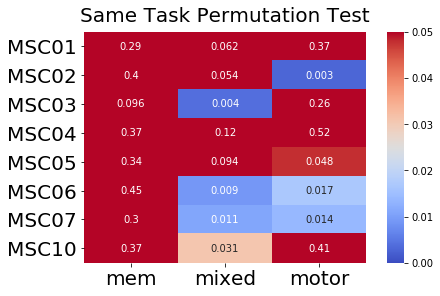

In [227]:
ax=sns.heatmap(ST_total, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Same Task Permutation Test', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/ST_pvals_plots.png', bbox_inches='tight')

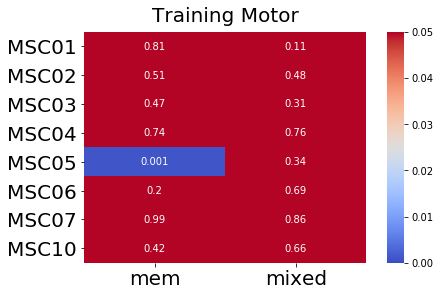

In [228]:
motor=DT_total.loc[(DT_total['train_task']=='motor')]
motor.drop(columns=['train_task'],inplace=True)

motor=motor.pivot('sub','test_task','pval')

ax=sns.heatmap(motor, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Motor', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_motor_plots.png', bbox_inches='tight')

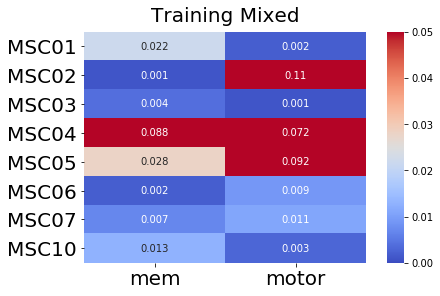

In [229]:
mixed=DT_total.loc[(DT_total['train_task']=='mixed')]
mixed.drop(columns=['train_task'],inplace=True)

mixed=mixed.pivot('sub','test_task','pval')

ax=sns.heatmap(mixed, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Mixed', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_mixed_plots.png', bbox_inches='tight')

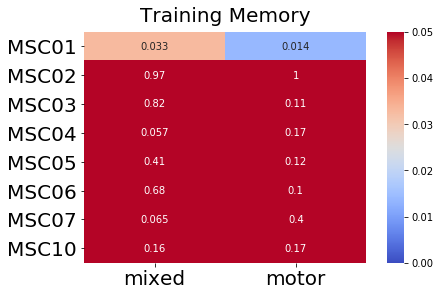

In [230]:
mem=DT_total.loc[(DT_total['train_task']=='mem')]
mem.drop(columns=['train_task'],inplace=True)

mem=mem.pivot('sub','test_task','pval')

ax=sns.heatmap(mem, annot=True, vmin=0, vmax=.05, cmap="coolwarm")
ax.set_title('Training Memory', fontsize=20, pad=10)
plt.ylabel('')
plt.xlabel('')
ax.tick_params(labelsize=20)
plt.savefig(thisDir+'output/mL/images/ridge/figs/DT_pvals_mem_plots.png', bbox_inches='tight')